# B1 Team-12 Project Hollywood Age Gaps Dataset

**Section B Team 12**

**Group Member; Kaixin Gao, Kang Ni, Xiaoyan Wang, Fei Han**

## Domain & Context
The Hollywood Age Gap dataset captures age differences between on-screen  couples in films released between 1935 and 2022. Each observation represents a paired relationship between two actors as partners. It including their respective ages at the time of release, gender, and the age gap. This dataset covers decades of changes in movie characters and the evolving expectations of the film industry and audiences regarding romantic relationships.

### Motivation
In many films, romantic relationships with significant age differences have always been a focus of attention. However, these discussions mostly remain at the level of individual cases and stereotypes, rarely systematically analyzing whether these phenomena exhibit any patterns.

This dataset allows us to answer several key questions from a holistic perspective:
Do romantic relationships in films follow fixed age pairing patterns? Are these patterns related to gender? Is the industry truly changing over time? And are extreme age-gap relationships exceptions, or are they recurring patterns shaped by specific actors or character types?

Clarifying these questions will help transform some stereotypes into verifiable structural models, thus providing clearer reference points for the film industry in content creation and casting decisions.

### Stakeholders & Decision-Makers

**Producers and film companies:**
* This allows them to determine whether their work is following common industry patterns or experimenting with different relationship dynamics, leading to more informed content decisions.

**Casting directors and talent agencies:**

* This helps them understand whether certain age or gender combinations are more frequently used, thus identifying the risk of character stereotyping or typecasting.

**Streaming platforms and content distributors:**

* They can use these insights to assess the overall diversity of content on their platforms.

**Actors and industry professionals:**

* This helps them better understand the impact of age on career development, allowing them to plan their career paths more effectively.

### Feasibility Considerations

The dataset is ready for analysis, with no missing values ​​in key variables and consistent age difference calculations, which facilitates exploratory analysis. However, there are some limitations. The data reflects casting practices in Hollywood films, not real-life interpersonal relationships. Therefore, the observed patterns represent industry norms within the film industry, rather than broader, standard social behavior. Furthermore, the films in this dataset are not categorized or weighted by genre, popularity, or box office impact. This means all films are given equal weight, regardless of their cultural influence. Given these factors, the findings should be interpreted as insights into Hollywood casting and character representation patterns, rather than general trends in interpersonal relationships.

##EDA

### 1. Import Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/Nanase1994/BA820-Unsupervised-and-Unstructured-Machine-Learning-Project-/main/age_gaps.csv"

df = pd.read_csv(url)

print(df.shape)
display(df.head())
display(df.tail())

(1155, 13)


,movie_name,release_year,director,age_difference,couple_number,actor_1_name,actor_2_name,character_1_gender,character_2_gender,actor_1_birthdate,actor_2_birthdate,actor_1_age,actor_2_age
0,Harold and Maude,1971,Hal Ashby,52,1,Ruth Gordon,Bud Cort,woman,man,1896-10-30,1948-03-29,75,23
1,Venus,2006,Roger Michell,50,1,Peter O'Toole,Jodie Whittaker,man,woman,1932-08-02,1982-06-03,74,24
2,The Quiet American,2002,Phillip Noyce,49,1,Michael Caine,Do Thi Hai Yen,man,woman,1933-03-14,1982-10-01,69,20
3,The Big Lebowski,1998,Joel Coen,45,1,David Huddleston,Tara Reid,man,woman,1930-09-17,1975-11-08,68,23
4,Beginners,2010,Mike Mills,43,1,Christopher Plummer,Goran Visnjic,man,man,1929-12-13,1972-09-09,81,38


,movie_name,release_year,director,age_difference,couple_number,actor_1_name,actor_2_name,character_1_gender,character_2_gender,actor_1_birthdate,actor_2_birthdate,actor_1_age,actor_2_age
1150,The Hunger Games: Catching Fire,2013,Francis Lawrence,0,1,Liam Hemsworth,Jennifer Lawrence,man,woman,1990-01-13,1990-08-15,23,23
1151,The Lake House,2006,Alejandro Agresti,0,1,Sandra Bullock,Keanu Reeves,woman,man,1964-07-26,1964-09-02,42,42
1152,Tolkien,2019,Dome Karukoski,0,1,Lily Collins,Nicholas Hoult,woman,man,1989-03-18,1989-12-07,30,30
1153,Transformers,2007,Michael Bay,0,1,Megan Fox,Shia LaBeouf,woman,man,1986-05-16,1986-06-11,21,21
1154,X-Men: First Class,2015,Matthew Vaughn,0,3,James McAvoy,Rose Byrne,man,woman,1979-04-21,1979-07-24,36,36


### 2. Data Quality Check and Cleaning



In [ ]:
print("Missing values statistics:")
print(df.isnull().sum())

print("\nNumerical column description:")
display(df.describe())

# In this dataset, actor_1 is defined as the older partner
df['check_diff'] = df['actor_1_age'] - df['actor_2_age']
incorrect_diffs = df[df['check_diff'] != df['age_difference']]
print(f"\nNumber of rows with inconsistent age difference calculation: {len(incorrect_diffs)}")

Missing values statistics:
movie_name            0
release_year          0
director              0
age_difference        0
couple_number         0
actor_1_name          0
actor_2_name          0
character_1_gender    0
character_2_gender    0
actor_1_birthdate     0
actor_2_birthdate     0
actor_1_age           0
actor_2_age           0
dtype: int64

Numerical column description:


,release_year,age_difference,couple_number,actor_1_age,actor_2_age
count,1155.000000,1155.000000,1155.000000,1155.000000,1155.000000
mean,2000.799134,10.424242,1.398268,40.635498,30.211255
std,16.365819,8.511086,0.754419,10.424173,7.495952
min,1935.000000,0.000000,1.000000,18.000000,17.000000
25%,1997.000000,4.000000,1.000000,33.000000,25.000000
50%,2004.000000,8.000000,1.000000,39.000000,29.000000
75%,2012.000000,15.000000,2.000000,47.000000,34.000000
max,2022.000000,52.000000,7.000000,81.000000,68.000000



Number of rows with inconsistent age difference calculation: 0


####Takeaway


The Hollywood Age Gap dataset included 1,155 movie couples spanning release years from 1935 to 2022. And no missing values across key variables such as actor ages, gender, and age differences. Additionally, the internal consistency check confirms that the reported age difference exactly matches the calculated difference between the older and younger actors’ ages for all observations.

### 3. Distribution Visualization

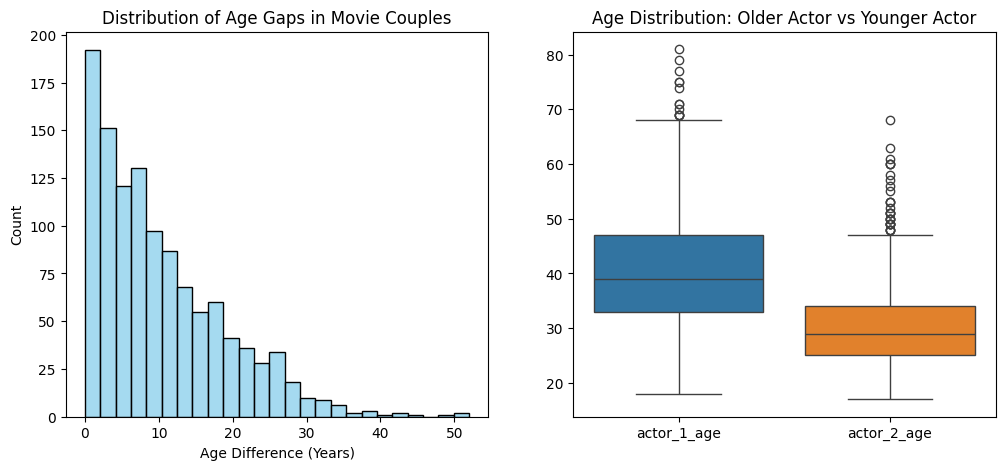

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 5))

# Histogram of age difference distribution
plt.subplot(1, 2, 1)
sns.histplot(df['age_difference'], color='skyblue')
plt.title('Distribution of Age Gaps in Movie Couples')
plt.xlabel('Age Difference (Years)')

# Boxplot comparing actor ages
plt.subplot(1, 2, 2)
sns.boxplot(data=df[['actor_1_age', 'actor_2_age']])
plt.title('Age Distribution: Older Actor vs Younger Actor')
plt.savefig('distribution_en.png')
plt.show()

#### Takeaway


The distribution of age differences is highly right-skewed, meaning that combinations with smaller age differences are the majority. However, a considerable number of extreme cases indicate that large age differences are not isolated anomalies but rather a recurring phenomenon in certain films.

Further comparison of actors' ages reveals structural asymmetry. Older actors have a wider age range and a higher upper age limit than younger actors. This pattern suggests an asymmetry in casting flexibility across different roles, where older age is more acceptable for one party than the other.

What surprised us was not only the right-skewed distribution of age gaps, but the fact that extremely large age differences appear repeatedly across films, rather than as rare, isolated cases.

### 4. Gender and Age Gap Analysis


Gender distribution of the older partner:
character_1_gender
man      941
woman    214
Name: count, dtype: int64

Percentage  of gender distribution of the older partner:
character_1_gender
man      0.814719
woman    0.185281
Name: count, dtype: float64


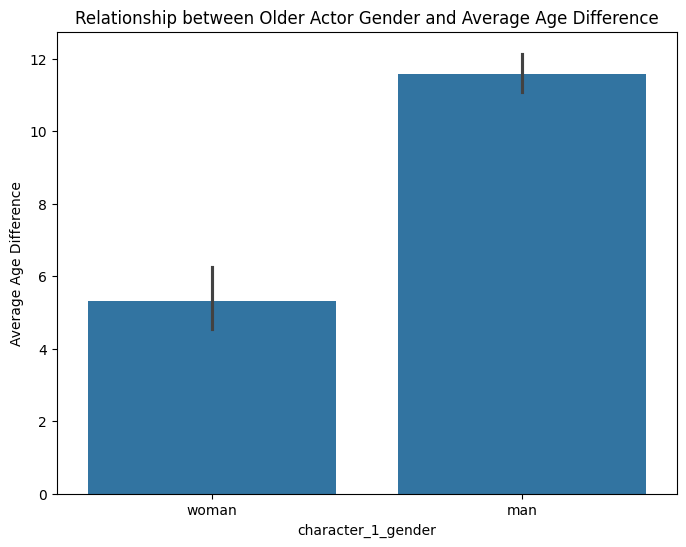

In [ ]:
# Count the distribution of genders acting as the older partner
gender_counts = df['character_1_gender'].value_counts()
print("\nGender distribution of the older partner:")
print(gender_counts)
print("\nPercentage  of gender distribution of the older partner:")
print(gender_counts / len(df))

# Visualization: Average age difference by gender of the older actor
plt.figure(figsize=(8, 6))
sns.barplot(x='character_1_gender', y='age_difference', data=df, estimator=np.mean)
plt.title('Relationship between Older Actor Gender and Average Age Difference')
plt.ylabel('Average Age Difference')
plt.show()

#### Takeaway


The gender distribution of older partners is extremely uneven: in over 80% of the observed couples, the older partner is male. This striking imbalance indicates that age differences on screen are not evenly distributed but are closely linked to gender.

Furthermore, the average age difference also varies by gender. When the older partner is male, the average age difference is more than twice that when the older partner is female. This pattern suggests that larger age gaps may be closely related to casting norms specific to each gender.

### 5. Time Trend Analysis

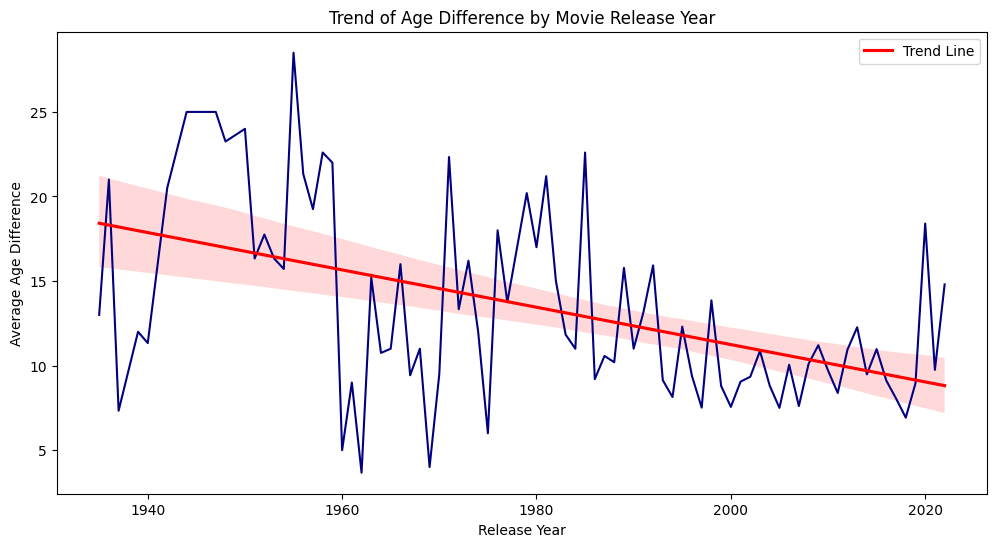

In [ ]:
# Calculate the trend of average age difference by release year
yearly_gap = df.groupby('release_year')['age_difference'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='release_year', y='age_difference', data=yearly_gap, color='navy')
sns.regplot(x='release_year', y='age_difference', data=yearly_gap, scatter=False, color='red', label='Trend Line')
plt.title('Trend of Age Difference by Movie Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Age Difference')
plt.legend()
plt.show()

#### Takeaway


The chart showing the trend of age difference by movie release year indicates a gradual downward trend in age difference over the decades, suggesting that the age gap between couples in films has narrowed in recent years. However, this downward trend is not smooth. There were larger fluctuations in the early years, and occasional instances of significant age differences still occur in recent years.

It remains unclear whether the observed narrowing of the average age gap reflects a genuine shift in industry norms or is driven by changes over time in the proportion of different types of on-screen relationships.

### 6. Identifying Extremes and High-Frequency Actors

In [ ]:
# Top 5 movies with the largest age difference
print("\nTop 5 Movies with the Largest Age Gap:")
display(df.nlargest(5, 'age_difference')[['movie_name', 'release_year', 'actor_1_name', 'actor_2_name', 'age_difference']])

# Count the most frequent actors
all_actors = pd.concat([df['actor_1_name'], df['actor_2_name']])
print("\nTop 10 Most Frequent Actors in the Dataset:")
print(all_actors.value_counts().head(10))


Top 5 Movies with the Largest Age Gap:


,movie_name,release_year,actor_1_name,actor_2_name,age_difference
0,Harold and Maude,1971,Ruth Gordon,Bud Cort,52
1,Venus,2006,Peter O'Toole,Jodie Whittaker,50
2,The Quiet American,2002,Michael Caine,Do Thi Hai Yen,49
3,The Big Lebowski,1998,David Huddleston,Tara Reid,45
4,Beginners,2010,Christopher Plummer,Goran Visnjic,43



Top 10 Most Frequent Actors in the Dataset:
Keanu Reeves          27
Adam Sandler          20
Sean Connery          17
Leonardo DiCaprio     17
Roger Moore           17
Pierce Brosnan        14
Keira Knightley       14
Scarlett Johansson    13
Reese Witherspoon     13
Harrison Ford         13
Name: count, dtype: int64


#### Takeaway


Several films feature age differences exceeding 40 years. This indicates that extreme age disparities are not isolated incidents but a recurring phenomenon in the industry. These extreme cases may represent a specific type of casting choice rather than random anomalies.

Furthermore, a small number of actors appear frequently in relationships with significant age differences. This suggests that certain actors may be particularly suited to playing roles involving large age gaps.

In summary, these observations indicate that the formation of age gap patterns is influenced not only by the characteristics of the films themselves but also potentially by specific actors or character types.

Another unresolved question is whether relationships with significant age differences constitute a group defined by recurring actors or character archetypes, rather than representing individual anomalies.

,actor_1_age_z,actor_2_age_z,age_diff_z
count,1.155000e+03,1.155000e+03,1.155000e+03
mean,-1.968603e-16,-2.460754e-17,4.921508e-17
std,1.000433e+00,1.000433e+00,1.000433e+00
min,-2.172384e+00,-1.763215e+00,-1.225315e+00
25%,-7.327973e-01,-6.955104e-01,-7.551358e-01
50%,-1.569627e-01,-1.616579e-01,-2.849569e-01
75%,6.108167e-01,5.056577e-01,5.378561e-01
max,3.873879e+00,5.043404e+00,4.887011e+00


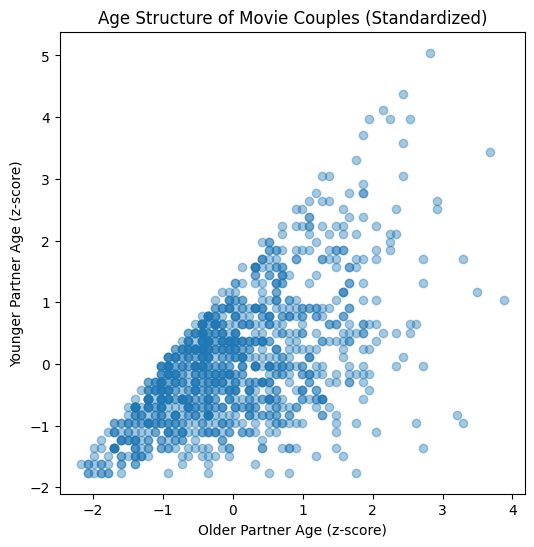

In [ ]:
from sklearn.preprocessing import StandardScaler

features = df[["actor_1_age", "actor_2_age", "age_difference"]].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

scaled_df = pd.DataFrame(X_scaled, columns=["actor_1_age_z", "actor_2_age_z", "age_diff_z"])

display(scaled_df.describe())

plt.figure(figsize=(6,6))
plt.scatter(
    scaled_df["actor_1_age_z"],
    scaled_df["actor_2_age_z"],
    alpha=0.4
)
plt.xlabel("Older Partner Age (z-score)")
plt.ylabel("Younger Partner Age (z-score)")
plt.title("Age Structure of Movie Couples (Standardized)")
plt.show()


## Domain Questions


Q1. **Can the romantic relationships depicted in films be categorized into several typical patterns based on the age combination of the couple? What are the significant differences in age gap and pairing methods among these patterns?**

* Helps filmmakers and casting teams understand that common romantic  relationships in films are not random, but rather follow several "repeatedly used age pairing templates."
* For content platforms, this helps identify which age combinations are more frequently used and which combinations are more niche or higher risk.
* A surprising outcome would be if on-screen couples did not form distinct age-structure groups, and instead exhibited a smooth, continuous distribution, which would suggest that extreme age gaps are merely tail cases rather than structurally different relationship types.


---


Q2.   **Do the age differences between couples show different patterns when the older partner is male versus female? Can these two types of relationships be considered two distinct relationship types?**

*   For film and television companies, this helps assess whether existing works overly rely on a single gender narrative pattern.
*   For platforms and production companies: It can be used for content diversity assessment and provides data support for female-perspective projects.
* It would be surprising if age-gap patterns were structurally similar regardless of whether the older partner is male or female, as this would contradict the strong gender imbalance and gap asymmetry observed in the exploratory analysis.

---


Q3.   **In recent years, the age gap between on-screen couples in films seems to be narrowing. Does this truly reflect a change in industry attitudes, or is it simply due to a shift in the proportion of different film genres?**


*   This helps decision-makers determine:
If it's merely a change in genre proportions, then certain traditional patterns still persist.
If it's a comprehensive change, it means audience preferences or social norms have shifted.
*   This is crucial for long-term strategy:
It helps decide whether to follow the mainstream or create differentiated content against the trend.
*   A surprising finding would be if all underlying relationship subgroups exhibited similar declines in age gaps over time, which would suggest a uniform industry shift rather than changes driven by compositional effects.

---


Q4.   **Are the extreme age-gap relationships depicted in films isolated incidents, or a recurring pattern shaped by specific actors or character types?**


*   This helps filmmakers determine whether certain actors are systematically cast in "large age-gap" roles and whether extreme age differences have become a recognizable commercial trope.
*   For casting management: it helps actors and their management teams assess whether their roles are being "stereotyped."
*   It would be surprising if extreme age-gap relationships were randomly distributed across films and actors, as this would contradict the observed concentration of large age gaps around specific actors and repeated casting patterns.



## AI Disclosure

I mainly use ChatGPT to check if my notebook meets the project requirements and to get suggestions for improvements.

ChatGPT chats: https://chatgpt.com/share/697a9a8d-28f0-800e-83dc-1ab731693bee
